**Importing Libraries**

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

**Reading CSV file**

In [38]:
df = pd.read_csv('Iris.csv')

In [39]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [40]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
df = df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Data Visualisaton**

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
colors = ['red','green','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

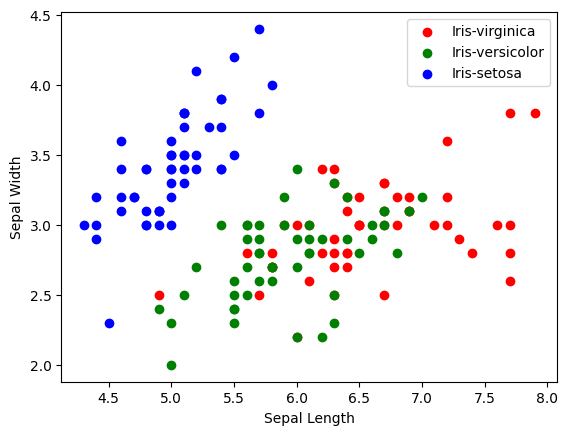

In [46]:
for i in range(3):
  x = df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

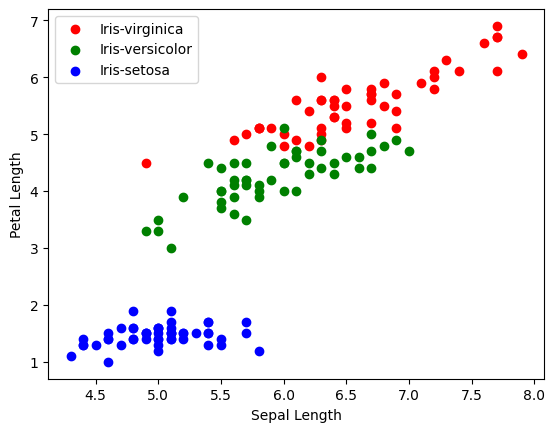

In [47]:
for i in range(3):
  x = df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

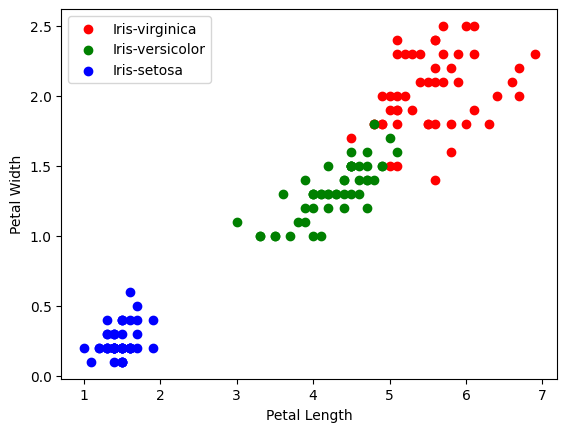

In [48]:
for i in range(3):
  x = df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

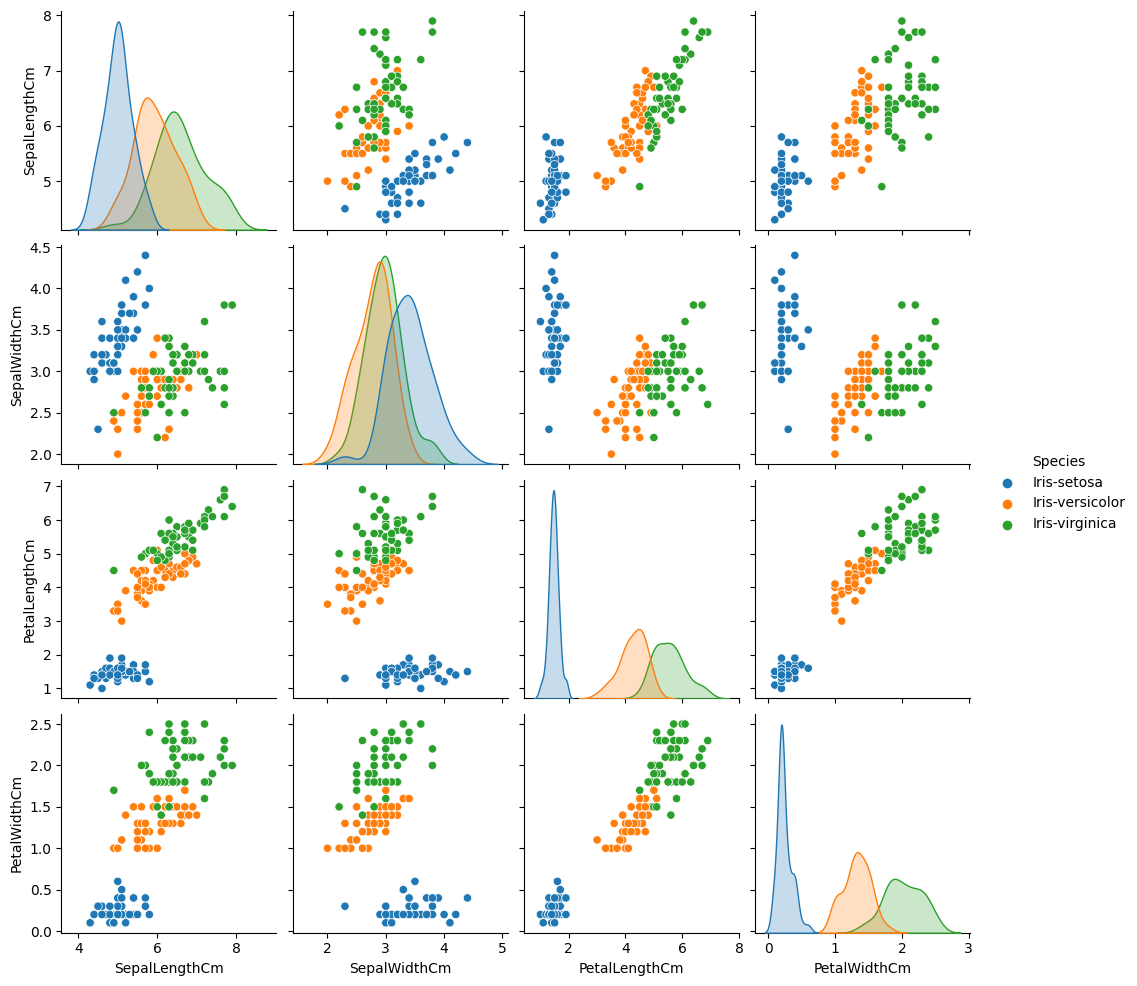

In [49]:
sns.pairplot(df,hue='Species')

**Correlation Matrix**

<ipython-input-50-c0c7406231a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

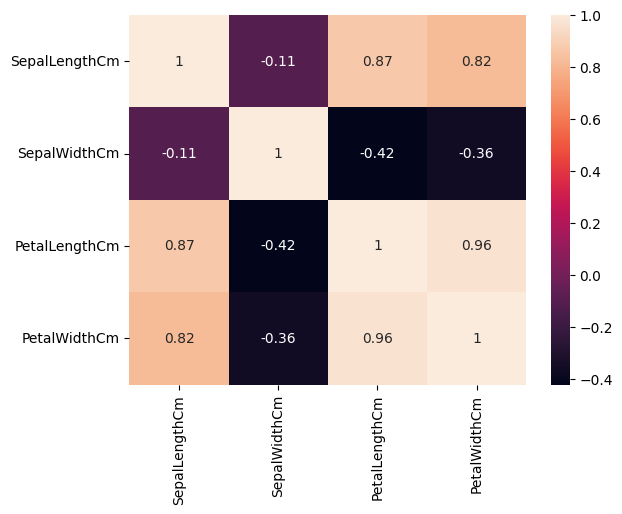

In [50]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [51]:
x = df.drop("Species", axis=1)
y = df["Species"]

**Spliting data into train and test**

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

**Prediction using Decision Tree**

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier(min_samples_split=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier()

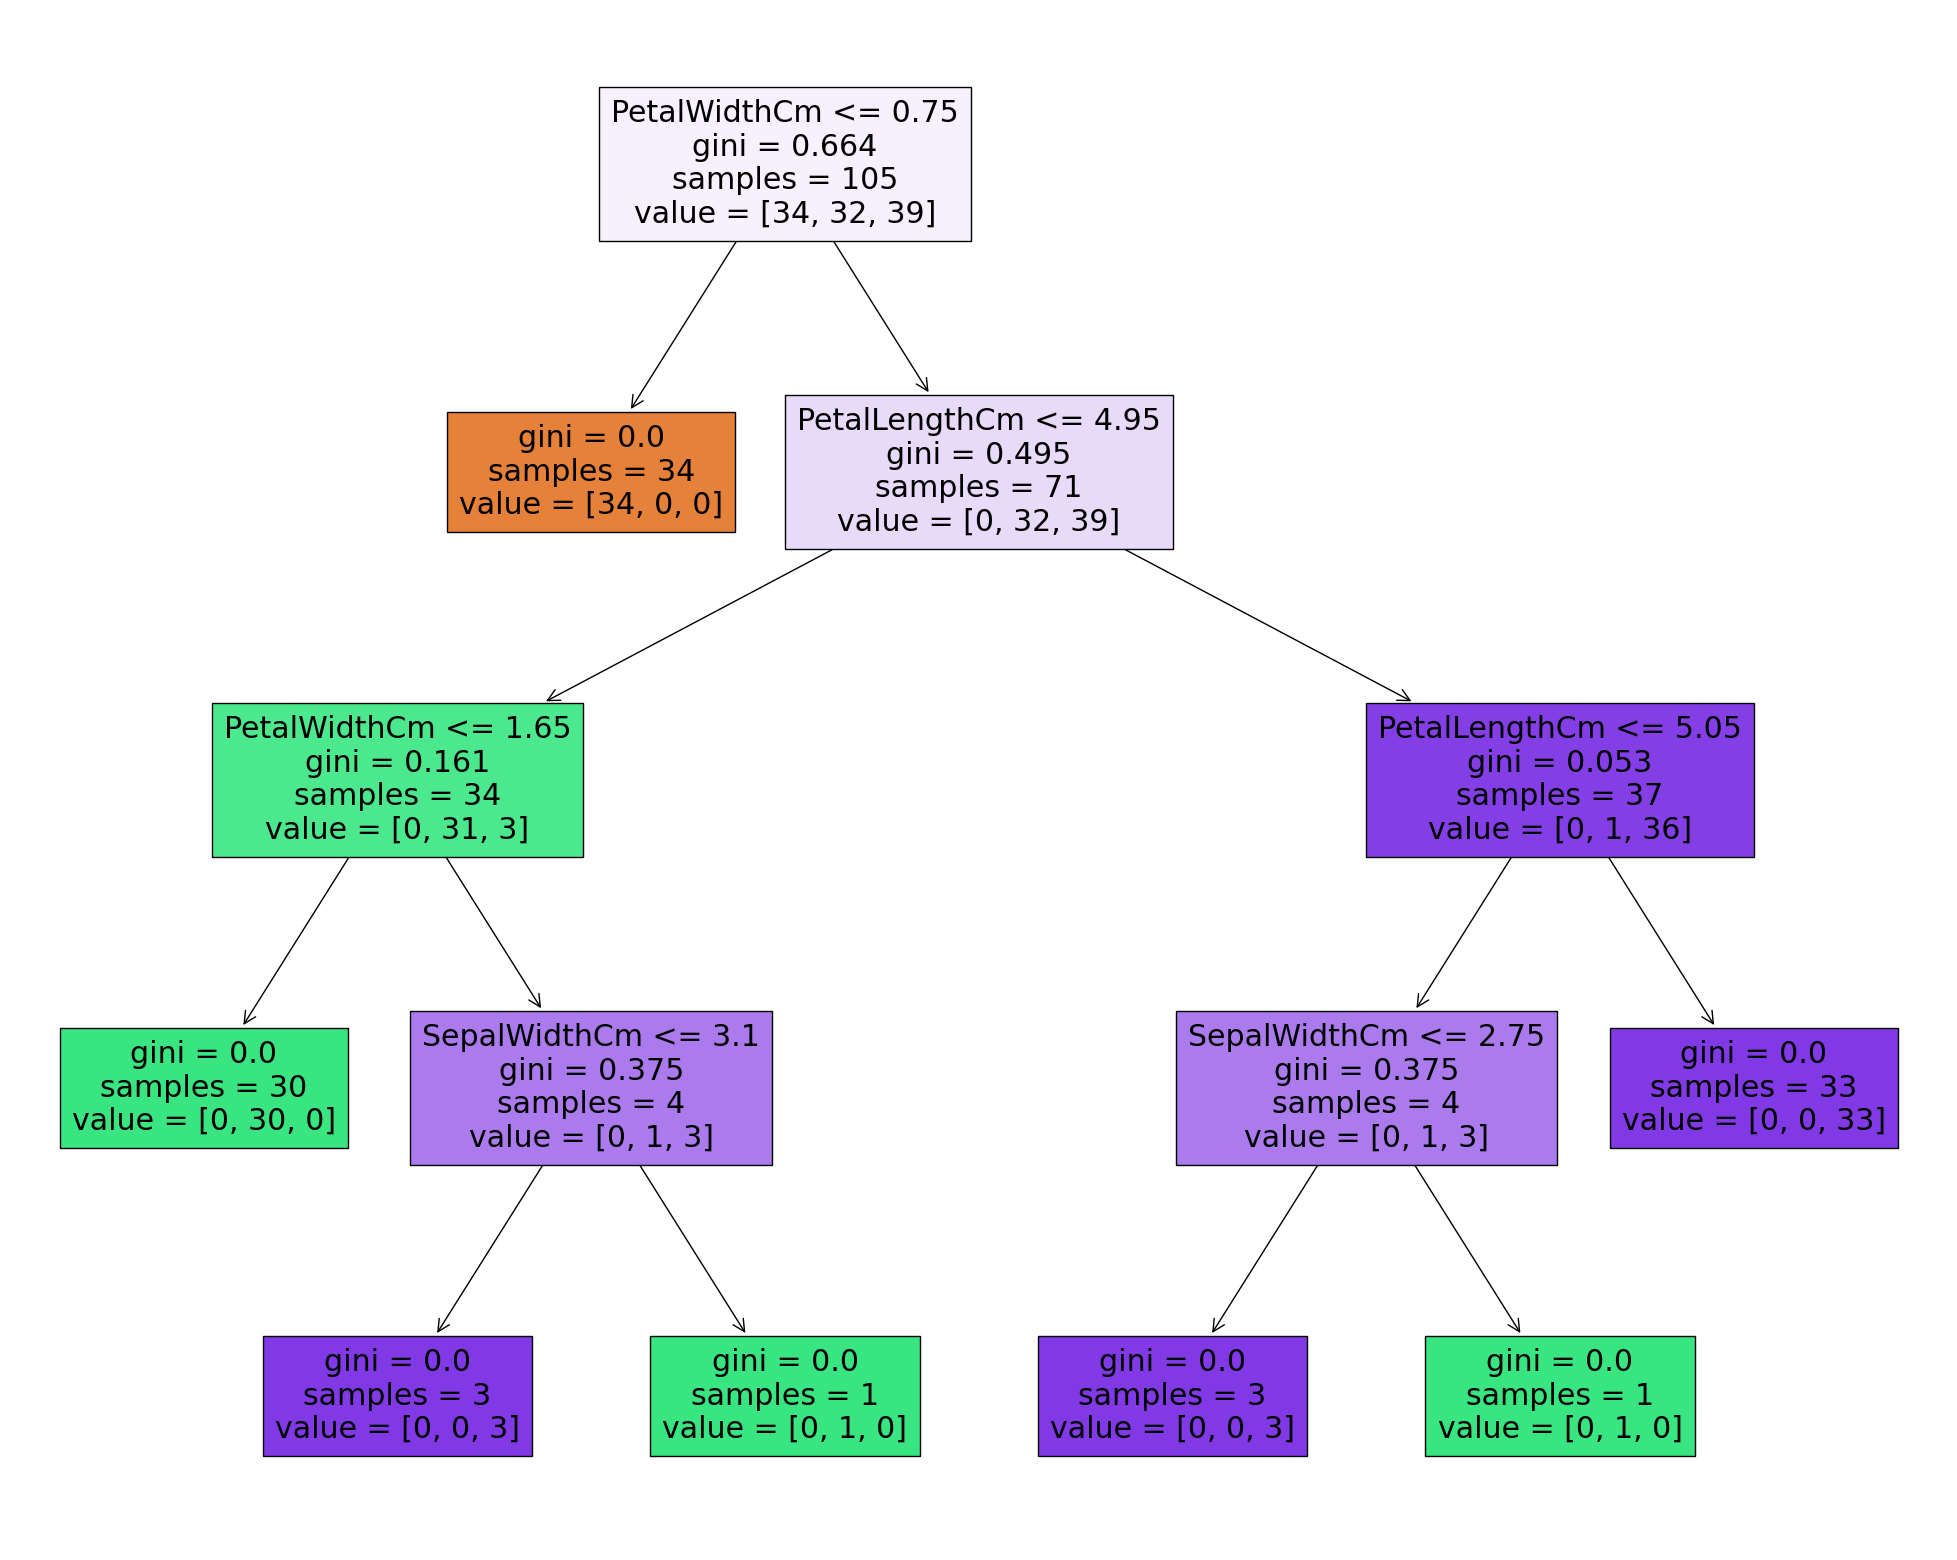

In [55]:
fig = plt.figure(figsize=(25,20))
fig_tree = tree.plot_tree(dt,feature_names=x.columns,filled=True)

**Calculating Accuracy**

In [56]:
y_dtp=dt.predict(x_test)

In [57]:
print('Decision Tree : ',accuracy_score(y_test,y_dtp)*100)

Decision Tree :  97.77777777777777


**Confusion Matrix**

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_dtp)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])